### Imports

In [78]:
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
from utils.utils import *

import hdbscan
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import sys

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.24 ms (started: 2023-05-31 14:43:28 -05:00)


### Parameters

In [79]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

method = params["method"][params["method_idx"]]
print("Method:\t\t", method)

group = params["group"][params["group_idx"]]
print("Group:\t\t", group)

subgroups = [str(k + 1) for k in range(group[1])]
print("Subgroup:\t", subgroups)

dimensions = params["dimensions"]
dimension = dimensions[0]
print("Dimensions:\t", dimensions)

/home/ealvarez/Project/GNN_Filter
Method:		 vgae
Group:		 ['pck1^', 2]
Subgroup:	 ['1', '2']
Dimensions:	 [3]
time: 3.67 ms (started: 2023-05-31 14:43:28 -05:00)


### Read graphs

In [80]:
# GNN method STD
df_edge_embeddings_join_filter_count_weight_std_avg = pd.read_csv("{}/output_edges/edges_filter_weight_std_avg/{}_{}_edge-filter-weight-std-avg_{}_{}.csv".format(dir, method, group[0], dimension, "L2"))
df_edge_embeddings_join_filter_count_weight_std_avg

G = nx.from_pandas_edgelist(df_edge_embeddings_join_filter_count_weight_std_avg, "source", "target", edge_attr=["weight"])
graph_detail(G)

Num. nodes: 5261
Num. edges: 426354

time: 932 ms (started: 2023-05-31 14:43:28 -05:00)


In [81]:
# Greedy STD
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-std.csv".format(dir, group[0]))

G11 = nx.from_pandas_edgelist(df_edges_filter, "source", "target", edge_attr=["weight"])
graph_detail(G11)

G11_ = nx.read_gexf("{}/output_greedy/graphs_filter/greedy_{}_graph-filter-std.gexf".format(dir, group[0]), node_type=float)
graph_detail(G11_)

Num. nodes: 5677
Num. edges: 732148

Num. nodes: 5677
Num. edges: 732148

time: 16.2 s (started: 2023-05-31 14:43:29 -05:00)


In [82]:
# Greedy STD-ANOVA
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-std-anova.csv".format(dir, group[0]))

G12 = nx.from_pandas_edgelist(df_edges_filter, "source", "target", edge_attr=["weight"])
graph_detail(G12)

G12_ = nx.read_gexf("{}/output_greedy/graphs_filter/greedy_{}_graph-filter-std-anova.gexf".format(dir, group[0]), node_type=float)
graph_detail(G12_)

Num. nodes: 4651
Num. edges: 473180

Num. nodes: 4691
Num. edges: 473180

time: 10.4 s (started: 2023-05-31 14:43:45 -05:00)


In [83]:
# Greedy ANOVA
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-anova.csv".format(dir, group[0]))

G21 = nx.from_pandas_edgelist(df_edges_filter, "source", "target")
graph_detail(G21)

G21_ = nx.read_gexf("{}/output_greedy/graphs_filter/greedy_{}_graph-filter-anova.gexf".format(dir, group[0]), node_type=float)
graph_detail(G21_)

Num. nodes: 4674
Num. edges: 524844

Num. nodes: 4674
Num. edges: 524844

time: 10.3 s (started: 2023-05-31 14:43:56 -05:00)


In [84]:
# Greedy ANOVA-STD
df_edges_filter = pd.read_csv("{}/output_greedy/edges_filter/greedy_{}_edge-filter-anova-std.csv".format(dir, group[0]))

G22 = nx.from_pandas_edgelist(df_edges_filter, "source", "target", edge_attr=["weight"])
graph_detail(G22)

G22_ = nx.read_gexf("{}/output_greedy/graphs_filter/greedy_{}_graph-filter-anova-std.gexf".format(dir, group[0]), node_type=float)
graph_detail(G22_)

Num. nodes: 4651
Num. edges: 473180

Num. nodes: 4651
Num. edges: 473180

time: 11.7 s (started: 2023-05-31 14:44:06 -05:00)


### Get common edges

STD

Nodes:
Greedy & vgae: 5261
Greedy - vgae: 416
vgae - Greedy: 0
Edges:
Greedy & vgae: 426354
Greedy - vgae: 305794
vgae - Greedy: 0


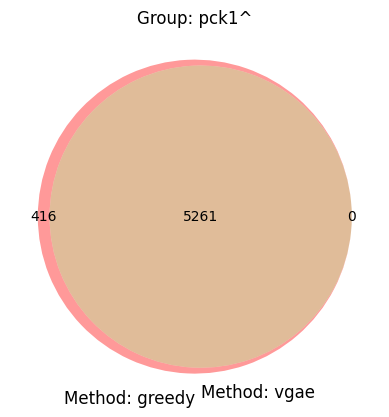

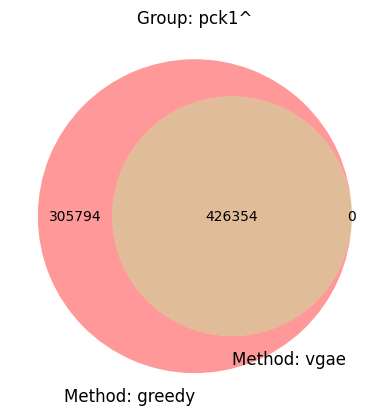

time: 1.81 s (started: 2023-05-31 14:44:18 -05:00)


In [85]:
common_nodes_edges = get_common_nodes_edges(G11_, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

STD-ANOVA

Nodes:
Greedy & vgae: 4320
Greedy - vgae: 371
vgae - Greedy: 941
Edges:
Greedy & vgae: 250390
Greedy - vgae: 222790
vgae - Greedy: 175964


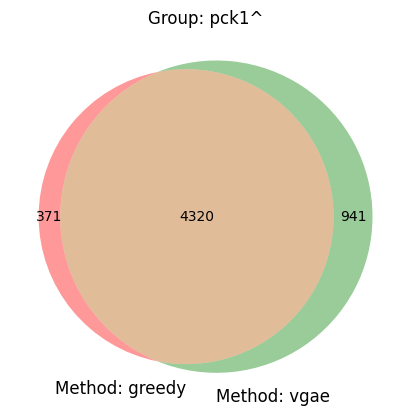

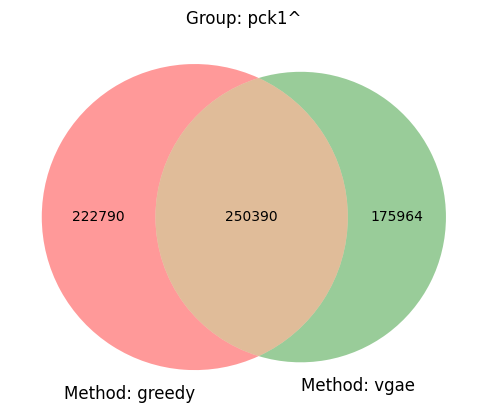

time: 1.49 s (started: 2023-05-31 14:44:20 -05:00)


In [86]:
common_nodes_edges = get_common_nodes_edges(G12_, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

ANOVA

Nodes:
Greedy & vgae: 4298
Greedy - vgae: 376
vgae - Greedy: 963
Edges:
Greedy & vgae: 250390
Greedy - vgae: 274454
vgae - Greedy: 175964


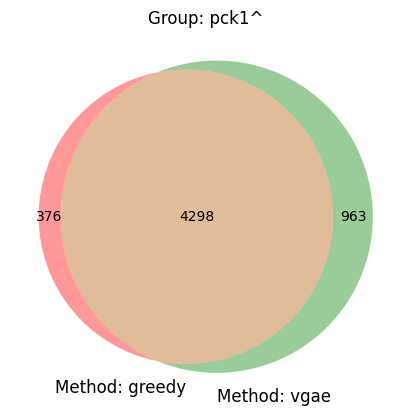

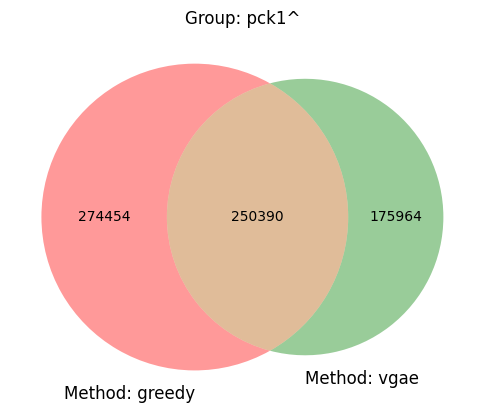

time: 1.56 s (started: 2023-05-31 14:44:22 -05:00)


In [87]:
common_nodes_edges = get_common_nodes_edges(G21_, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

ANOVA-STD

Nodes:
Greedy & vgae: 4295
Greedy - vgae: 356
vgae - Greedy: 966
Edges:
Greedy & vgae: 250390
Greedy - vgae: 222790
vgae - Greedy: 175964


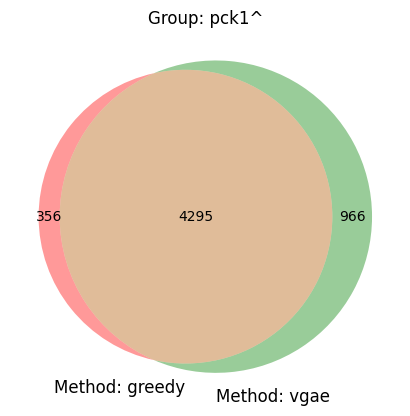

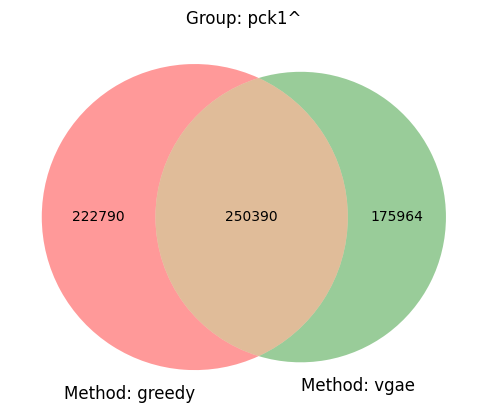

time: 1.4 s (started: 2023-05-31 14:44:23 -05:00)


In [88]:
common_nodes_edges = get_common_nodes_edges(G22_, G, "Greedy", method)

venn2(subsets = (len(common_nodes_edges[1][0]), len(common_nodes_edges[2][0]), len(common_nodes_edges[0][0])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()

venn2(subsets = (len(common_nodes_edges[1][1]), len(common_nodes_edges[2][1]), len(common_nodes_edges[0][1])), set_labels=("Method: greedy", "Method: {}".format(method)))
plt.title("Group: {}".format(group[0]))
plt.show()